The data file diabetes.csv contains data of 768 patients. In this data there are 8 attributes
(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age)
and 1 response variable (Outcome). The response variable, Outcome, has binary value (1 indicating the
outcome is diabetes and 0 means no diabetes). For this assignment purposes we will consider this data
as a population. Use this data to perform the following:

a) Set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


This code imports the pandas library as pd, then loads a CSV file named "diabetes.csv" into a DataFrame called data. Finally, it prints the first few rows of the dataset using the head() function.

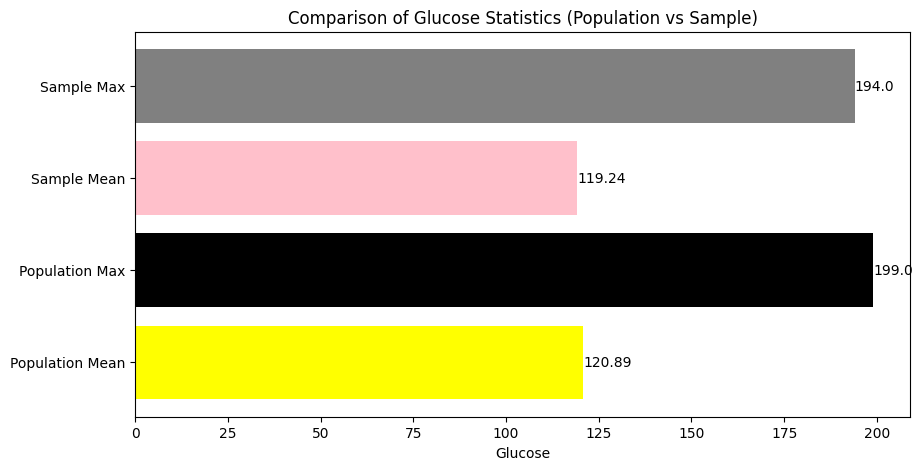

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('diabetes.csv')
sample_data = data.sample(n=25)
glucose_mean = data['Glucose'].mean()
glucose_max = data['Glucose'].max()
sample_mean_glucose = sample_data['Glucose'].mean()
sample_max_glucose = sample_data['Glucose'].max()
plt.figure(figsize=(10, 5))
colors = ['yellow', 'black', 'pink', 'grey']
bars = plt.barh(['Population Mean', 'Population Max', 'Sample Mean', 'Sample Max'],
[glucose_mean, glucose_max, sample_mean_glucose, sample_max_glucose],color=colors)
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             round(bar.get_width(), 2),
             va='center')
plt.title('Comparison of Glucose Statistics (Population vs Sample)')
plt.xlabel('Glucose')
plt.show()


In this code, we load the dataset, calculate statistics for the population and the sample, and then create a horizontal bar chart to compare these statistics. We use custom colors for the bars and add data labels to each bar for better visualization. Finally, we add a title and labels to the plot.

b) Find the 98th percentile of BMI of your sample and the population and compare the results
using charts.

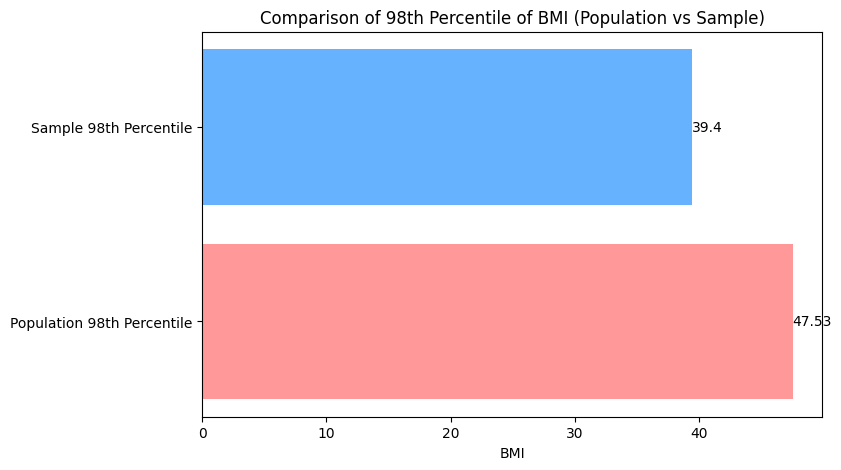

In [4]:
import numpy as np
import matplotlib.pyplot as plt
population_98thbmi = np.percentile(data['BMI'], 98)
sample_98thbmi = np.percentile(sample_data['BMI'], 98)
plt.figure(figsize=(8, 5))
colors = ['#FF9999', '#66B2FF']
bars = plt.barh(['Population 98th Percentile', 'Sample 98th Percentile'],[population_98thbmi, sample_98thbmi],color=colors)
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             round(bar.get_width(), 2),
             va='center')
plt.title('Comparison of 98th Percentile of BMI (Population vs Sample)')
plt.xlabel('BMI')
plt.show()


This code calculates the 98th percentile of BMI for both the population and the sample data. Then, it creates a horizontal bar chart to compare these percentiles between the population and the sample, using custom colors for the bars. Finally, it adds a title and labels to the plot for clarity.








c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings

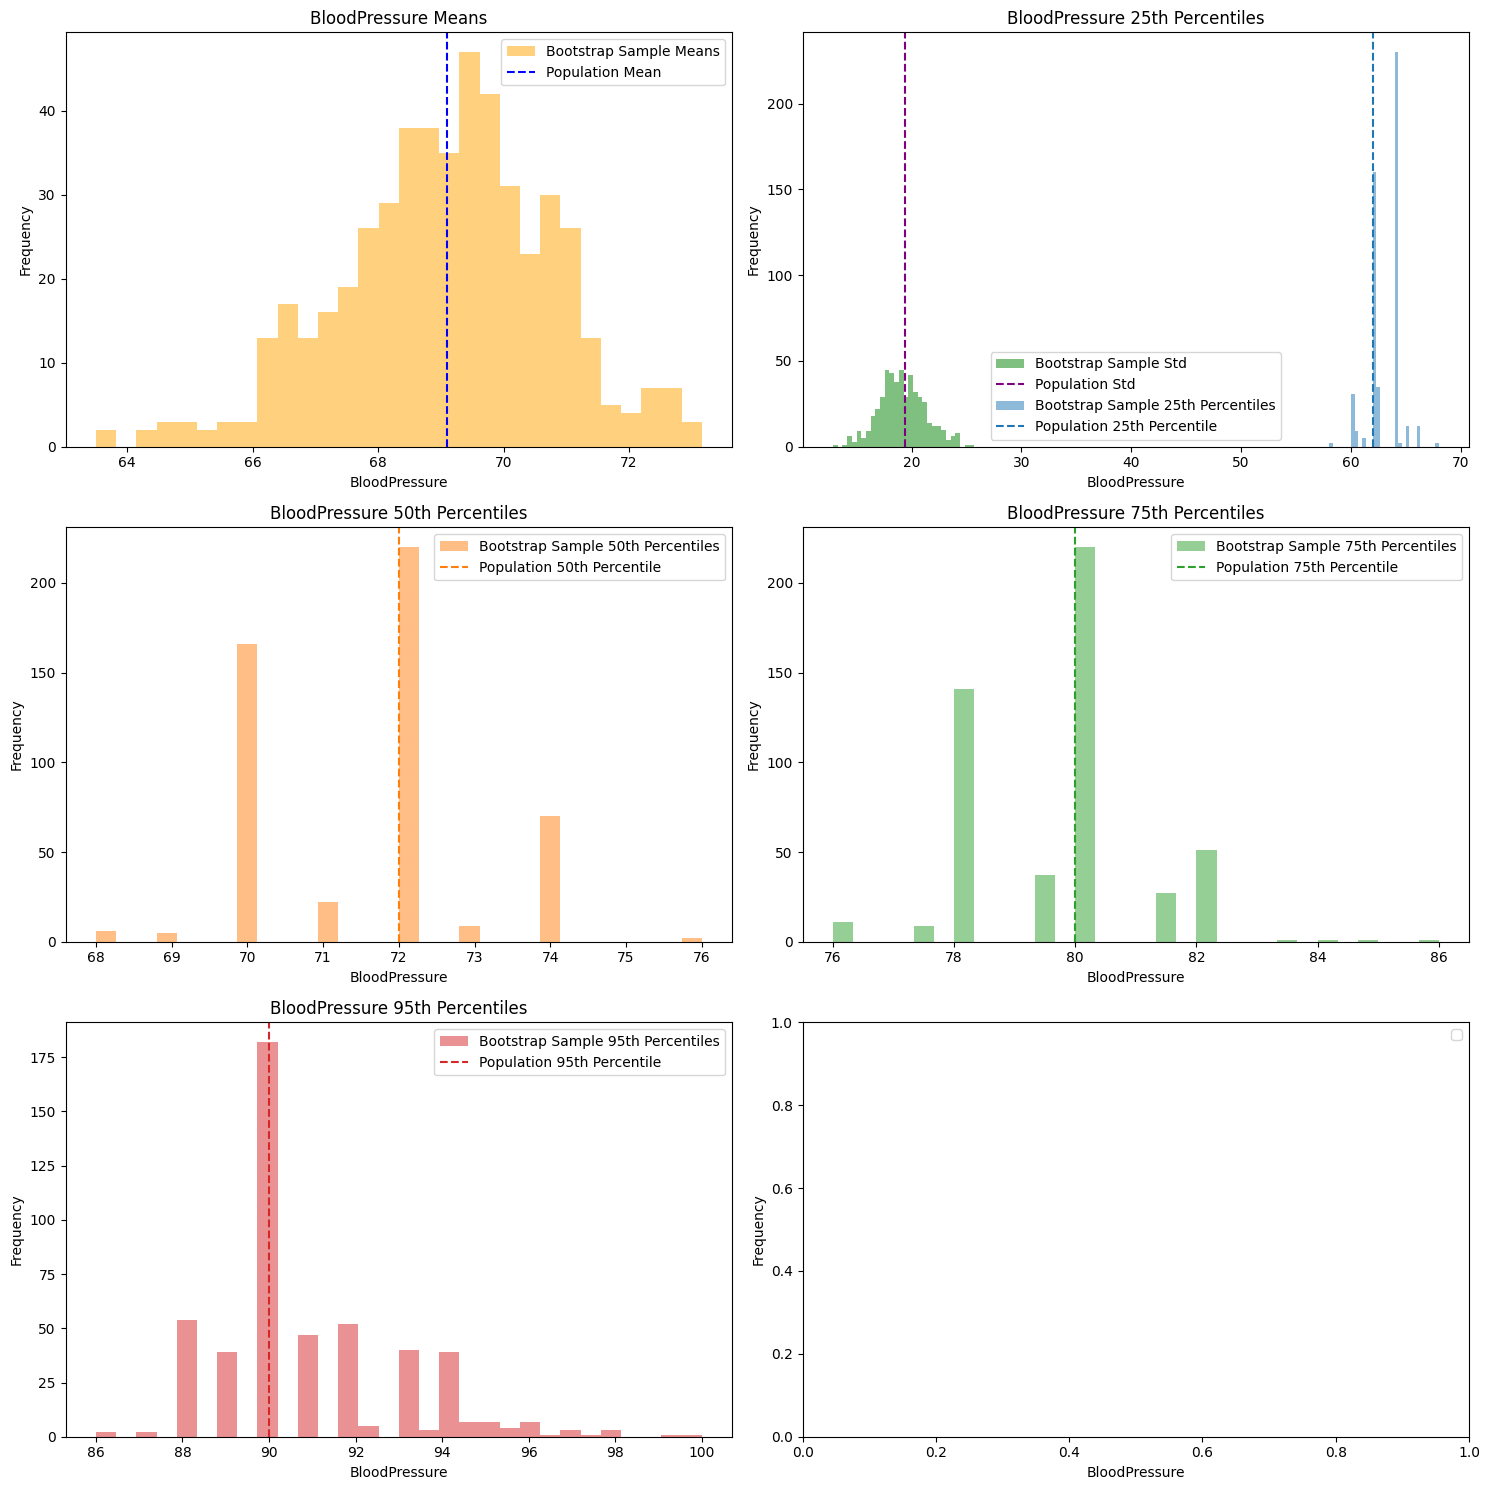

In [5]:
import numpy as np
import matplotlib.pyplot as plt
population_mean = data['BloodPressure'].mean()
population_std = data['BloodPressure'].std()
population_percentiles = np.percentile(data['BloodPressure'], [25, 50, 75, 95])
n_bootstrap = 500
bootstrap_size = 150
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = {25: [], 50: [], 75: [], 95: []}
for _ in range(n_bootstrap):
    bootstrap_sample = np.random.choice(data['BloodPressure'], size=bootstrap_size, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))
    bootstrap_stds.append(np.std(bootstrap_sample))
    for percentile in [25, 50, 75, 95]:
        bootstrap_percentiles[percentile].append(np.percentile(bootstrap_sample, percentile))
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
axs[0, 0].hist(bootstrap_means, bins=30, alpha=0.5, color='orange', label='Bootstrap Sample Means')
axs[0, 0].axvline(x=population_mean, color='blue', linestyle='--', label='Population Mean')
axs[0, 0].set_title('BloodPressure Means')
axs[0, 1].hist(bootstrap_stds, bins=30, alpha=0.5, color='green', label='Bootstrap Sample Std')
axs[0, 1].axvline(x=population_std, color='purple', linestyle='--', label='Population Std')
axs[0, 1].set_title('BloodPressure Standard Deviations')
for i, percentile in enumerate([25, 50, 75, 95]):
    row = (i + 1) // 2
    col = (i + 1) % 2
    axs[row, col].hist(bootstrap_percentiles[percentile], bins=30, alpha=0.5,
                       color='C{}'.format(i), label=f'Bootstrap Sample {percentile}th Percentiles')
    axs[row, col].axvline(x=population_percentiles[i], color='C{}'.format(i), linestyle='--',
                          label=f'Population {percentile}th Percentile')
    axs[row, col].set_title(f'BloodPressure {percentile}th Percentiles')
for ax in axs.flat:
    ax.set_xlabel('BloodPressure')
    ax.set_ylabel('Frequency')
    ax.legend()
plt.tight_layout()
plt.show()


This code calculates population statistics such as mean, standard deviation, and percentiles. Then, it performs bootstrap sampling to estimate the distribution of these statistics. Finally, it visualizes the results using histograms and vertical lines representing population statistics.